# DIGITAL IMAGE PROCESSING MINI PROJECT

In [ ]:
   Submitted By : Apoorva Sharma
        Roll No : 202403
          Batch : ME CSE Regular(2020-22)
        Subject : Digital Image Processing
   Submitted To : Amit Doegar (Associate Professor, Department of  Computer Science and Engineering, NITTTR, Chandigarh)

# IMAGE SEGMENTATION USING PYTHON'S SCIKIT-IMAGE MODULE

In [14]:
%matplotlib inline

Installation
!pip install -U scikit-image(Linux and OSX)

!pip install scikit-image(Windows)

For Conda-based distributions
!conda install scikit-image

Overview of Images in Python
Importing a GrayScale Image from the skimage library

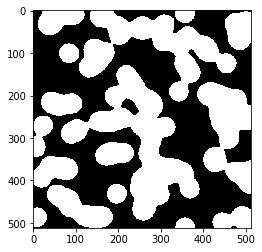

In [16]:
from skimage import data
import numpy as np
import matplotlib.pyplot as plt
image = data.binary_blobs()
plt.imshow(image, cmap='gray')

Importing a Colored Image from the skimage library

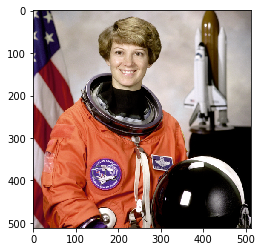

In [17]:
from skimage import data
import numpy as np
import matplotlib.pyplot as plt
image = data.astronaut()
plt.imshow(image)

Importing an image from an external source

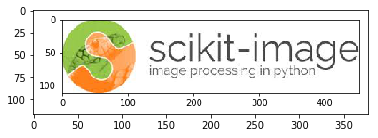

In [18]:
# The I/O module is used for importing the image
from skimage import data
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
image = io.imread('scikit_logo.png')
plt.imshow(image)

In [19]:
images = io.ImageCollection('../images/*.png:../images/*.jpg')
print('Type:', type(images))

Type: <class 'skimage.io.collection.ImageCollection'>


In [20]:
#Saving file as 'logo.png'
io.imsave('logo.png',image)

Image segmentation
Thresholding
It is the simplest way to segment objects from a background by choosing pixels above or below a certain threshold. This is generally helpful when we intend to segment objects from their background. You can read more about thresholding here. Let's try this on an image of a textbook which comes preloaded with the scikit-image dataset.

Basic Imports

In [21]:
import numpy as np
import matplotlib.pyplot as plt

import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color

In [22]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax


Image

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2c295e90128>)

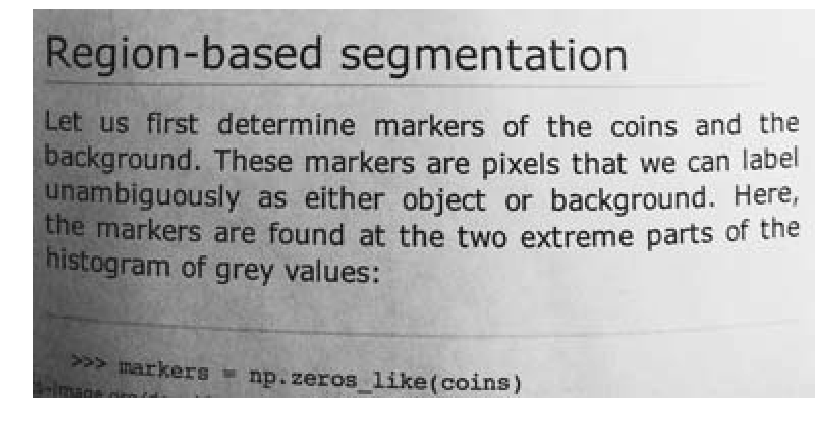

In [23]:
text = data.page()
image_show(text)

Histograms
A histogram is a graph showing the number of pixels in an image at different intensity values found in that image. Simply put, a histogram is a graph wherein the x-axis shows all the values that are in the image while the y-axis shows the frequency of those values.v

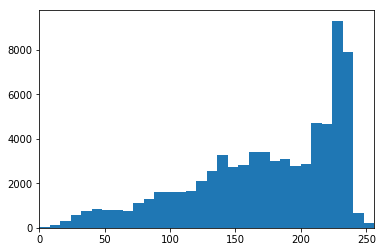

In [24]:
fig, ax = plt.subplots(1, 1)
ax.hist(text.ravel(), bins=32, range=[0, 256])
ax.set_xlim(0, 256);

Supervised thresholding
Trying simple NumPy methods and a few different thresholds on this image. 
Because we are setting the threshold, this is supervised segmentation.

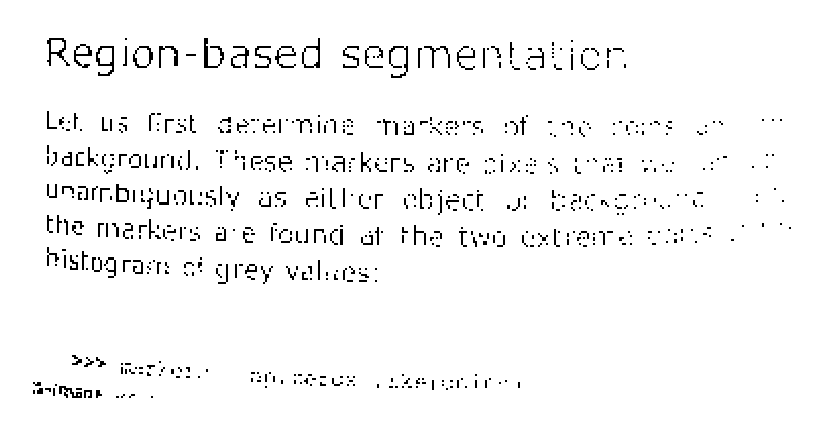

In [25]:
text_segmented = text>50


image_show(text_segmented);

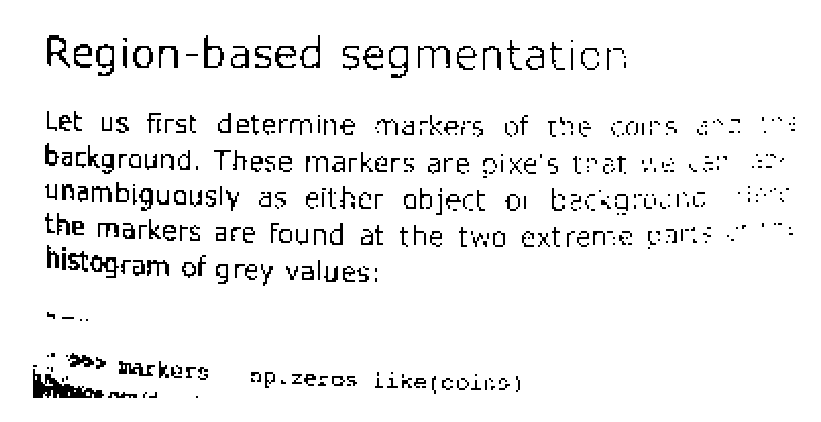

In [26]:
text_segmented = text>70


image_show(text_segmented);

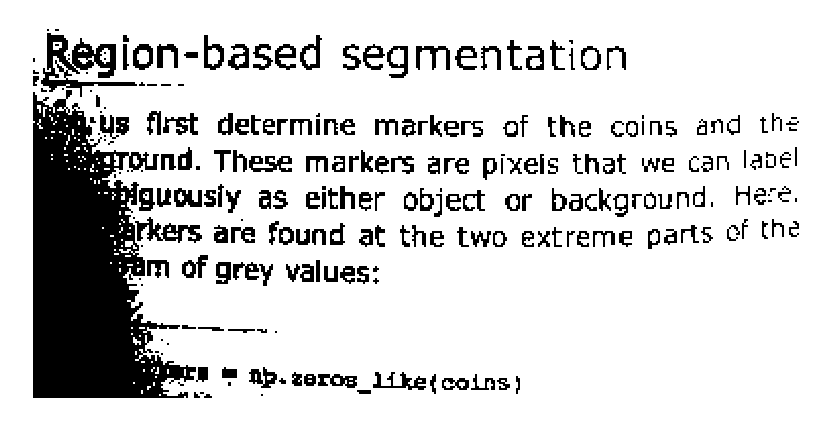

In [27]:
text_segmented = text>120


image_show(text_segmented);

We didn't get any ideal results since the shadow on the left creates problems. Let's try with unsupervised thresholding now.

Unsupervised thresholding¶
Scikit-image has a number of automatic thresholding methods, which require no input in choosing an optimal threshold. Some of the methods are : otsu, li, local.

otsu

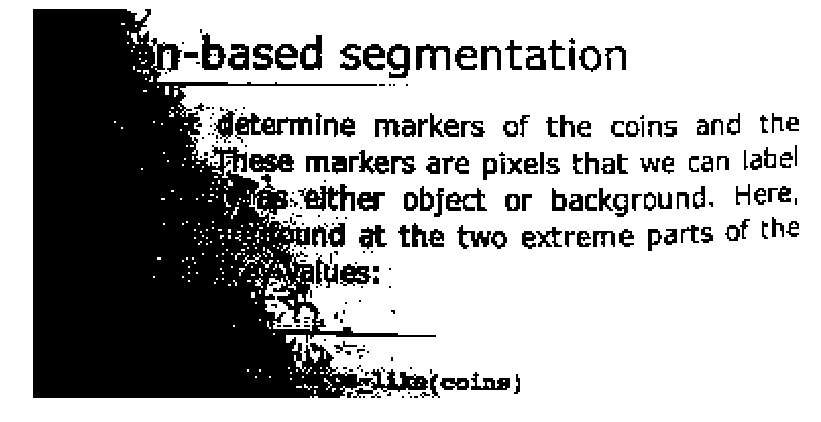

In [28]:
text_threshold = filters.threshold_otsu(text)  # Hit tab with the cursor after the underscore, try several methods

image_show(text > text_threshold);

li

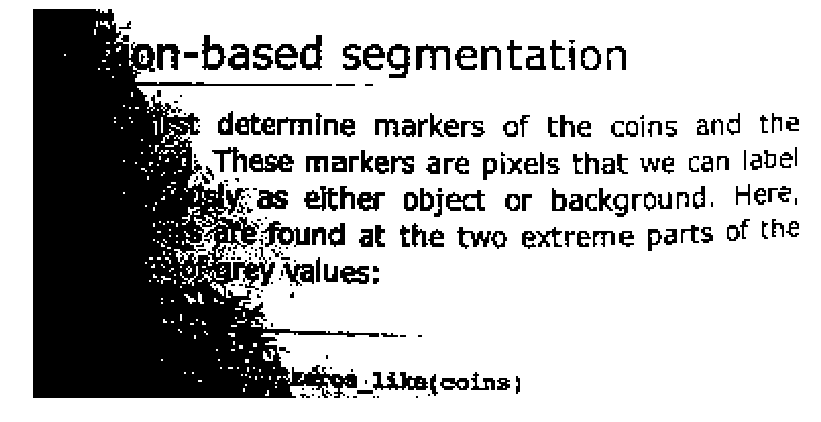

In [29]:
text_threshold = filters.threshold_li(text)  # Hit tab with the cursor after the underscore, try several methods

image_show(text > text_threshold);

local
In the case of local, we also need to specify the block_size . Offset helps to tune the image for better results.

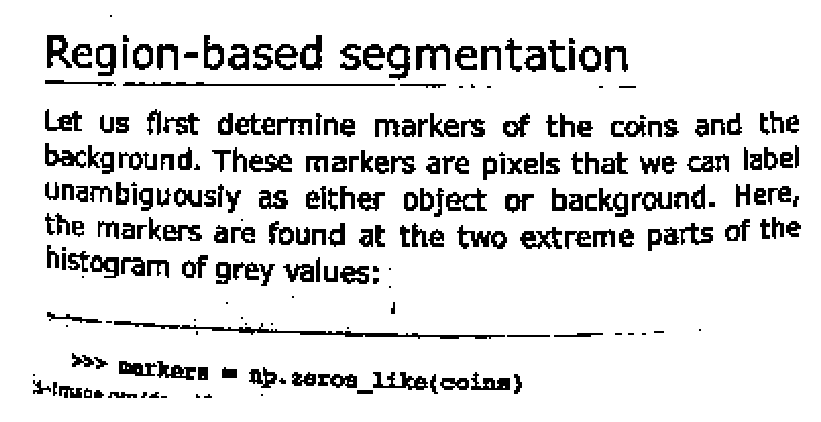

In [30]:
text_threshold = filters.threshold_local(text,block_size=51, offset=10) 
image_show(text > text_threshold);

This is pretty good and has got rid of the noisy regions to a large extent.